# <center> LAB 8 - Pancakes With A Problem! </center>
<center>Harold Alfredo Díaz Ortiz</center>

## Punto 1

Modify the <a href="https://github.com/gjhernandezp/algorithms/blob/master/PancakesTrees.ipynb">PancakesTrees.ipynb</a>&nbsp;code in your own  to plot the Pancake Network and calculate&nbsp;<em>Pn</em>&nbsp;for small&nbsp;<em>n</em>&#8216;s.

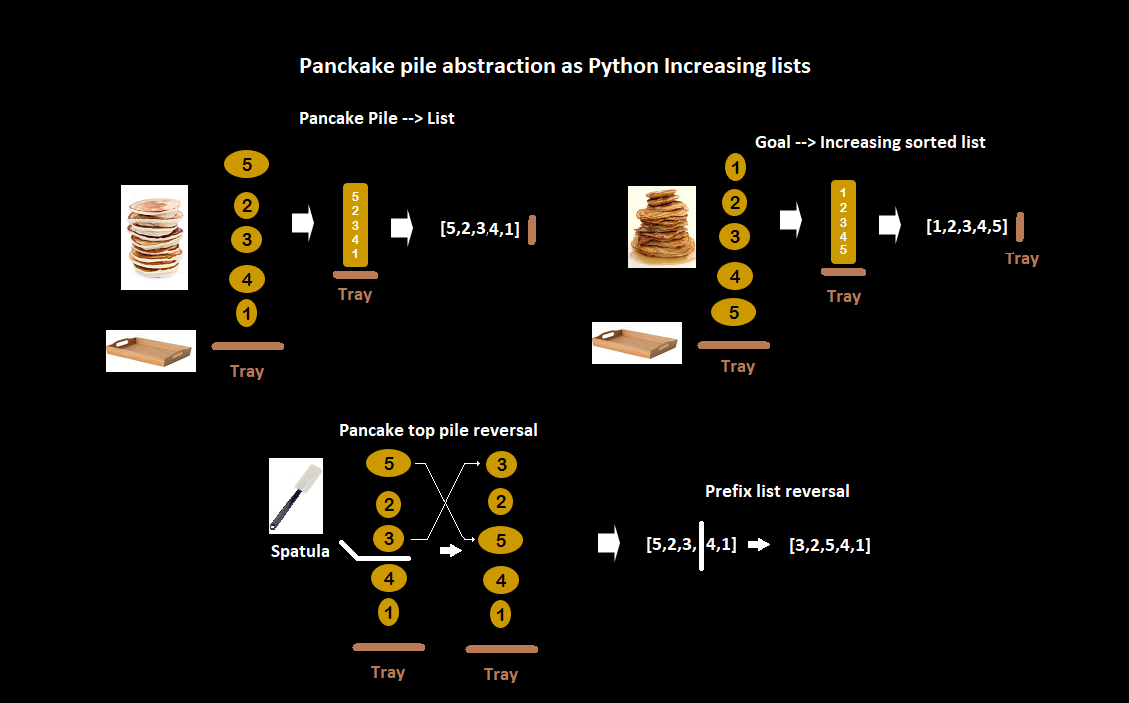

## Introducción

Teniendo en cuenta el código original y la información en <a href="https://drive.google.com/file/d/1eDfsdTA7G3Ax0_xAZDf3iQjj8qRyx7E5/view"> Pancakes with a Problem! </a>, se hicieron algunas modificaciones a los scripts para obtener cada $P_n$ con $n \leq 5$ (un número lo suficientemente pequeño) y formar una red 
con alguna permutación que corresponda a la pila de pancakes que más volteadas 
necesita para obtener una pila ordenada.

In [2]:
import pydot
from collections import defaultdict 
from IPython.display import Image, display

Todas las modificaciones hechas al código original en <a href="https://github.com/gjhernandezp/algorithms/blob/master/PancakesTrees.ipynb">PancakesTrees.ipynb</a> son señaladas con tres símbolos númerales $(###)$ al final de cada línea agregada o modificada.

In [3]:
def lstr(p):
        return ''.join([str(elem) for elem in p])

En el código original, los grafos dibujados son digrafos dirigidos, mostrando una forma de árbol. La diferencia entre el árbol y la red es que los nodos del final no se conectan en el árbol, pasando a ser así hojas. Sin embargo, en la red es necesario que se hallen todas las conexiones posibles, y para ello modificamos la siguiente función con miras de formar una red completa.

In [4]:
def ModifiedBFS(s): 
        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="graph") ###
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
        list_edges = [] ###

        while queue:
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            node = pydot.Node(lstr(s))
            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if s != sorted(s):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if (d != sorted(d)):
                    node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                  
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  list_edges.append([lstr(s),lstr(d)]) ###
                  graph[lstr(s)].append(lstr(d))
                  queue.append(d) 
                  visited[lstr(d)] = True
                elif lstr(d) not in graph[lstr(s)]: ###
                  graph[lstr(s)].append(lstr(d)) ###
                  if ([lstr(s),lstr(d)] and [lstr(d),lstr(s)]) not in list_edges: ###
                    edge = pydot.Edge(lstr(s),lstr(d)) ###
                    G.add_edge(edge) ###
                    list_edges.append([lstr(s),lstr(d)])

        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

Para los grafos de red, modificaremos el tipo de grafo de $G$ a un grafo simple, para así no mostrar aristas dirigidas. Lo segundo es formar una lista de las aristas en $G$. Sean $v_i, v_j$ dos vértices de $G$, si ambos están conectados, se dice que $V_{ij}$ es la arista que une a $v_i$ con $v_j$. Al ser un grafo no dirigido, el par $(v_i, v_j)$ no es un par ordenado, por lo que $(v_i, v_j) = (v_j, v_i)$. Al considerar la colección de aristas de $G$, también estamos considerando las conexiones que deberían tener los últimos nodos considerados hojas en nuestro anterior esquema. Cerrando lo que antes era un árbol, conseguimos una red para la cual cada nodo $v_i$ tiene exactamente $n-1$ vecinos.

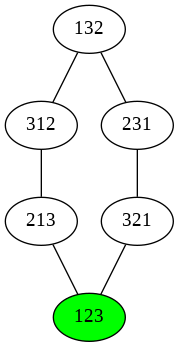

In [5]:
p = [1,3,2]
ModifiedBFS(p)

Al ejecutar la función, encontraremos que ahora tenemos una red, en este caso para la permutación $[1, 3, 2]$. A partir de este análisis, nos es posible hallar $P_n$.

In [6]:
def ModifiedBFSPreSols(s): 
        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="graph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
        list_edges = [] ###
  
        while queue: 
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            
            flag = False
            for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]
                if(d == sorted(d)):
                     flag = True
            if flag:
              node = pydot.Node(lstr(s),style="filled", fillcolor="yellow")
            else: 
              node = pydot.Node(lstr(s))

            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if (s != sorted(s)):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if (d != sorted(d)):
                    node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                  
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  list_edges.append([lstr(s),lstr(d)]) ###
                  graph[lstr(s)].append(lstr(d))
                  queue.append(d) 
                  visited[lstr(d)] = True
                elif lstr(d) not in graph[lstr(s)]: ###
                  graph[lstr(s)].append(lstr(d)) ###
                  if ([lstr(s),lstr(d)] and [lstr(d),lstr(s)]) not in list_edges: ###
                    edge = pydot.Edge(lstr(s),lstr(d)) ###
                    G.add_edge(edge) ###
                    list_edges.append([lstr(s),lstr(d)])
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

La función anterior sólo se diferencia en la primera en que colorea también los nodos vecinos al nodo que contiene la permutación ordenada de números. Así mismo, es muy similar a la función homónima del código original, sólo realizándose los cambios necesarios para mostrar una red en vez de un árbol.

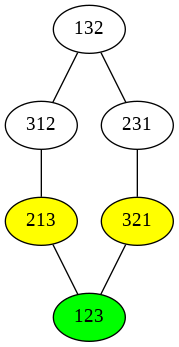

In [7]:
p = [1,3,2]
ModifiedBFSPreSols(p)

## Hallar $P_n$

La siguiente función genera la lista de todas las permutaciones posibles para $n$. El objetivo es tomar esta lista y encontrar cuál pila de panqueques nos genera más movimientos de espátula para ordenar la pila en el menor número de volteadas posibles.

In [8]:
def all_outputs(n):
    s = list(range(n, 0, -1))
    s_list = []
    queue = []
    queue.append(s) 
    s_list.append(s)

    while queue:
        s = queue.pop(0) 
        if s != sorted(s):
            for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]
                if (d != s) and not(d in s_list):
                    queue.append(d)
                    s_list.append(d)
    return s_list

La siguiente función se modificó para que en lugar de graficar un árbol después de $L$ iteraciones, nos indicara cuál es el menor número de movimientos necesarios para ordenar una permutación $s$ dada. Si $s$ es una permutación ordenada, el resultado es $0$. Si después de $L$ movimientos no se halló una manera de ordenar la permutación $s$, la salida es $-1$. Y si en algún $l < L$ se encontró la permutación ordenada, el resultado será $l+1$, agregando el 1 por el primer nodo que originalmente era la raíz del árbol.

In [9]:
def ModifiedBFSPreSolsLevel(s,L):
        if s == sorted(s):
          return 0

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        #G = pydot.Dot(graph_type="graph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append([s,0]) 
        visited[lstr(s)] = True
        list_edges = [] ###
  
        while queue: 
            # Dequeue a vertex from queue 
            e = queue.pop(0)
            s = e[0]
            l = e[1] 
            graph[lstr(s)]=[]
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if (s != sorted(s)) and (l < L):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if d == sorted(d):
                    return l+1
                  list_edges.append([lstr(s),lstr(d)]) ###
                  graph[lstr(s)].append(lstr(d))
                  queue.append([d,l+1]) 
                  visited[lstr(d)] = True
                elif lstr(d) not in graph[lstr(s)]: ###
                  graph[lstr(s)].append(lstr(d)) ###
                  if ([lstr(s),lstr(d)] and [lstr(d),lstr(s)]) not in list_edges: ###
                    list_edges.append([lstr(s),lstr(d)])
        return -1

Para hallar $P_n$, lo primero que hacemos es obtener el conjunto $A$ de todas las permutaciones posibles sobre $n$ números. Con ello, tomamos cada permutación y encontramos el número mínimo de movimientos necesarios para ordenar dicha permutación, tomando como límite $L = 5$ al ser el máximo número $n$ que tomaremos para esta práctica y porque hasta dicho $n$, $P_n \leq n$.

In [10]:
def get_pn(n, A):
  arr = None
  p_n = -1
  for i in range(0, len(A)):
    aux = [int(x) for x in A[i]]
    p_i = ModifiedBFSPreSolsLevel(aux, 5)
    if p_i > p_n:
      arr = A[i]
      p_n = p_i
  return arr, p_n

Los $P_n$ para todo $n \leq 5$ son los siguientes:

In [11]:
pn_list = []
for i in range(5):
  permutations = all_outputs(i+1)
  arr, p_n = get_pn(i+1, permutations)
  print("pn, n=", str(i+1), ": ", str(p_n), ". ", str(arr), sep="")
  pn_list.append([arr, p_n])

pn, n=1: 0. [1]
pn, n=2: 1. [2, 1]
pn, n=3: 3. [1, 3, 2]
pn, n=4: 4. [4, 2, 3, 1]
pn, n=5: 5. [2, 4, 3, 5, 1]


## Redes

Las redes para cada $P_n$ obtenido son las siguientes:

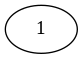

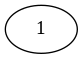

P1 = 0. [1]


In [12]:
i = 1
ModifiedBFS(pn_list[i-1][0])
ModifiedBFSPreSols(pn_list[i-1][0])
print("P", i, " = ", pn_list[i-1][1], ". ", pn_list[i-1][0], sep="")

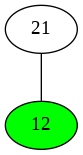

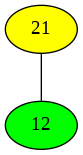

P2 = 1. [2, 1]


In [13]:
i = 2
ModifiedBFS(pn_list[i-1][0])
ModifiedBFSPreSols(pn_list[i-1][0])
print("P", i, " = ", pn_list[i-1][1], ". ", pn_list[i-1][0], sep="")

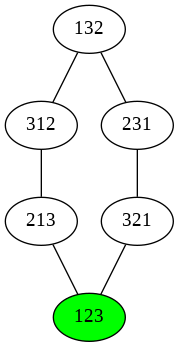

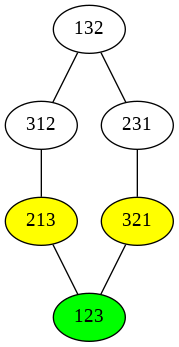

P3 = 3. [1, 3, 2]


In [14]:
i = 3
ModifiedBFS(pn_list[i-1][0])
ModifiedBFSPreSols(pn_list[i-1][0])
print("P", i, " = ", pn_list[i-1][1], ". ", pn_list[i-1][0], sep="")

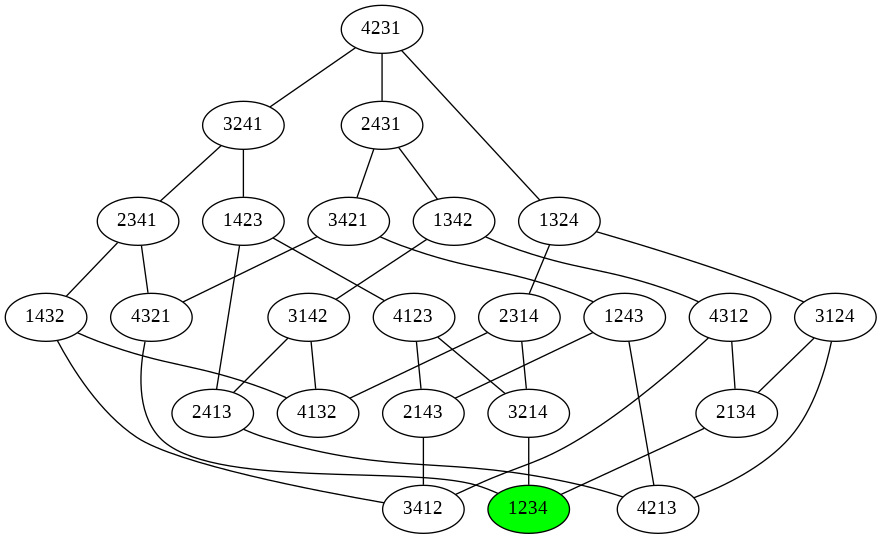

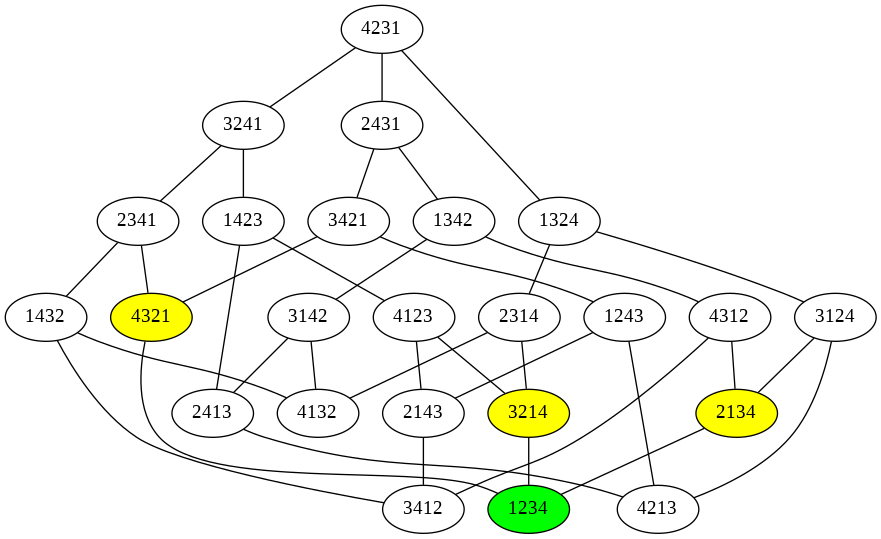

P4 = 4. [4, 2, 3, 1]


In [15]:
i = 4
ModifiedBFS(pn_list[i-1][0])
ModifiedBFSPreSols(pn_list[i-1][0])
print("P", i, " = ", pn_list[i-1][1], ". ", pn_list[i-1][0], sep="")

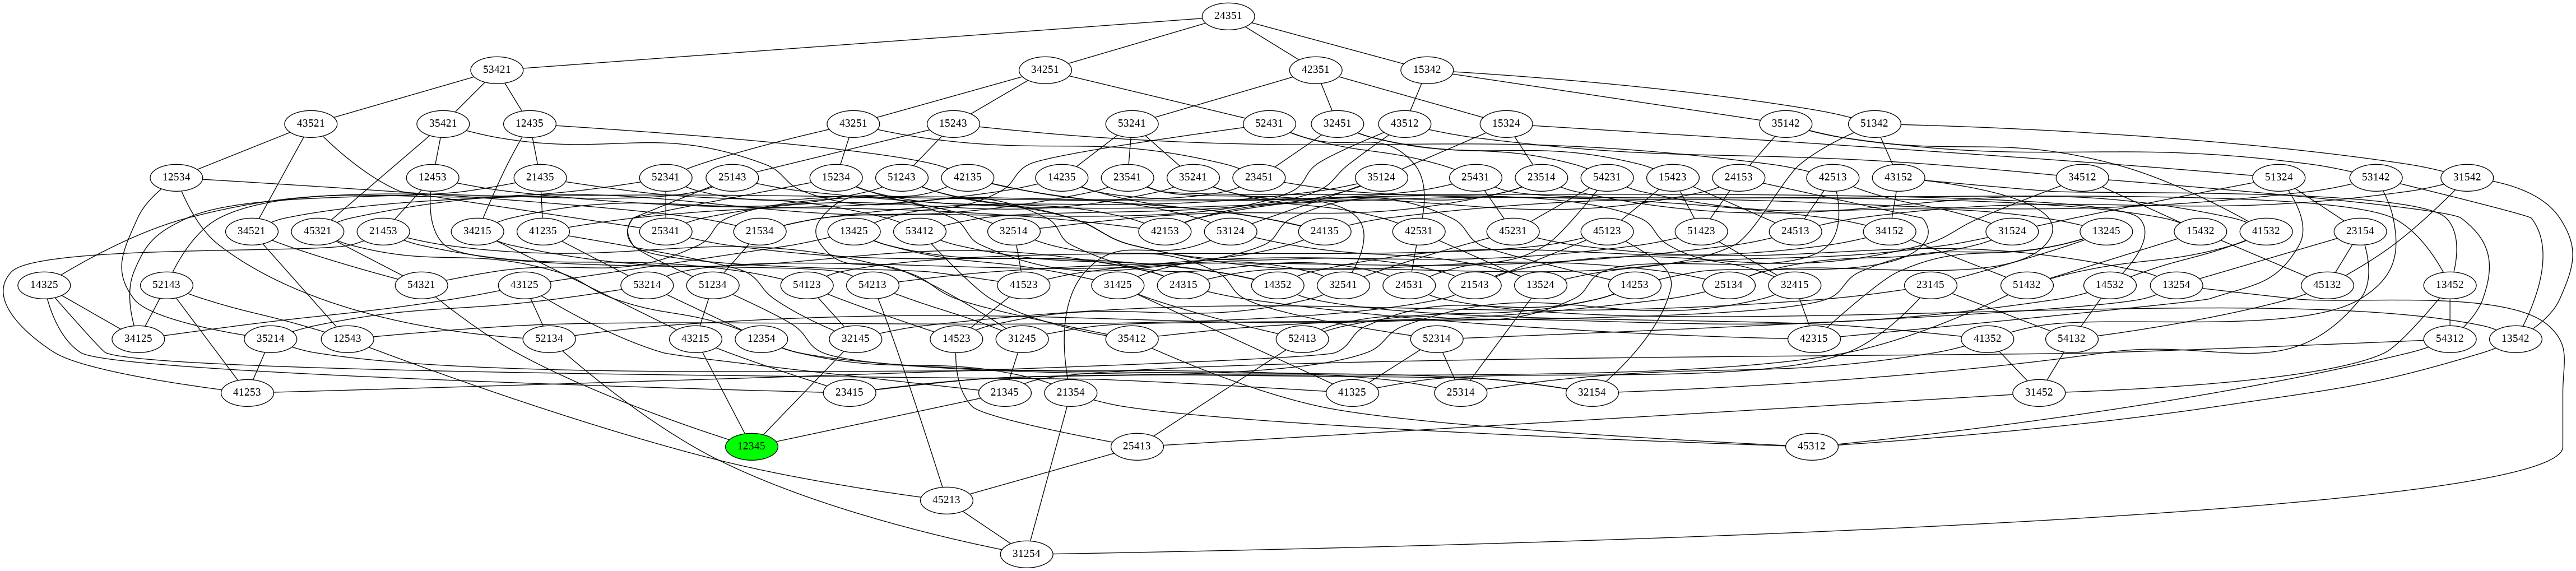

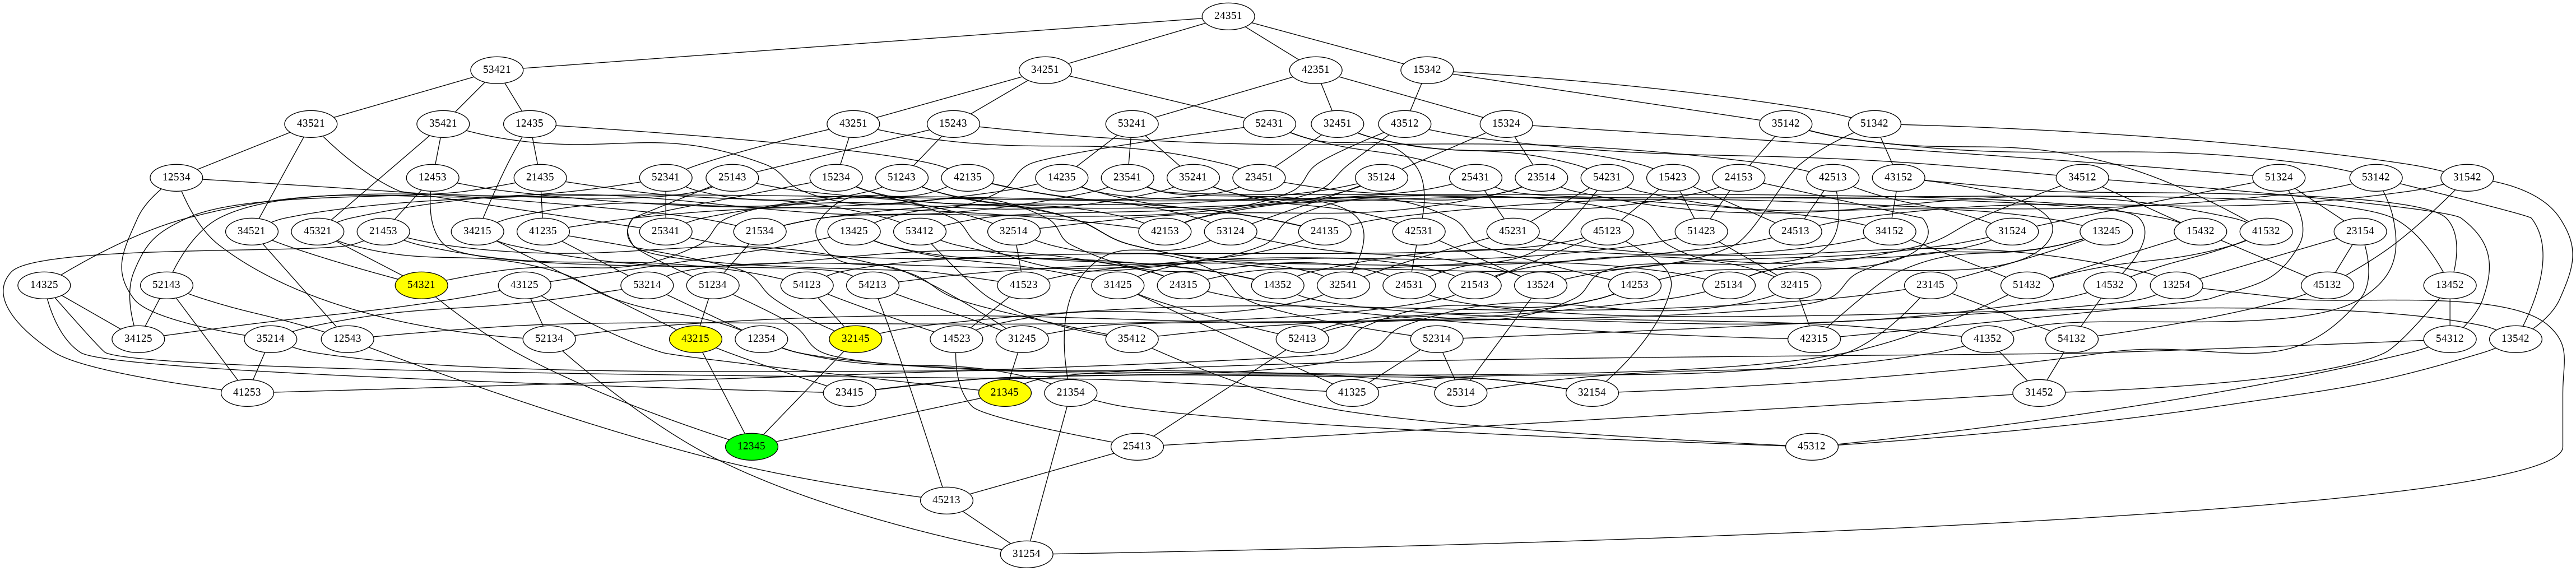

P5 = 5. [2, 4, 3, 5, 1]


In [16]:
i = 5
ModifiedBFS(pn_list[i-1][0])
ModifiedBFSPreSols(pn_list[i-1][0])
print("P", i, " = ", pn_list[i-1][1], ". ", pn_list[i-1][0], sep="")

## References

- Breadth First Search or BFS for a Graph https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/

- Graph visualization using Python https://www.youtube.com/watch?v=SpDI6-FvtJY

- nikhilkumarsingh
/
PyDot-Examples https://github.com/nikhilkumarsingh/PyDot-Examples/blob/master/Directory_Structure_Plotter.ipynb

- pydot https://pypi.org/project/pydot/

- Graphviz https://www.graphviz.org/

- NetworkX https://networkx.github.io/


